In [1]:
### 🔧 TAREA
# Compara el desempeño de la red neuronal con la regresión logística. Analiza sus métricas, curva ROC y precisión vs. recall.

In [2]:
import sys
sys.path.append("../src")

import train
import model
import utils
import evaluate as ev

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
# 🔧 Cargar configuración
config = train.load_config("../config.yaml")

In [4]:
# 📦 Cargar y preparar los datos
X, y = train.load_data("../data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

In [5]:
# 🧪 Entrenar modelo base (Regresión Logística)
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)

# 🔍 Predicciones del modelo base
y_pred_log = base_model.predict(X_test)
y_proba_log = base_model.predict_proba(X_test)[:, 1]

In [6]:
# 📥 Cargar modelo entrenado Red Neuronal
from tensorflow.keras.models import load_model
nn_model = load_model("../models/nn_model.keras")

# 🔍 Predicciones de Red Neuronal
y_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = ev.predict_with_threshold(y_proba_nn, threshold=0.5)

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [7]:
# 📊 Evaluación individual
ev.evaluate_model(y_test, y_pred_log, y_proba_log, model_name="Regresión Logística")
ev.evaluate_model(y_test, y_pred_nn, y_proba_nn, model_name="Red Neuronal")


📊 Evaluación del modelo: Regresión Logística
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      4000
           1       0.76      0.65      0.70      4004

    accuracy                           0.72      8004
   macro avg       0.73      0.72      0.72      8004
weighted avg       0.73      0.72      0.72      8004

F1 Score     : 0.7009
Precision    : 0.7586
Recall       : 0.6513
ROC AUC      : 0.7968

📊 Evaluación del modelo: Red Neuronal
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      4000
           1       0.78      0.69      0.73      4004

    accuracy                           0.75      8004
   macro avg       0.75      0.75      0.75      8004
weighted avg       0.75      0.75      0.75      8004

F1 Score     : 0.7318
Precision    : 0.7812
Recall       : 0.6883
ROC AUC      : 0.8237


{'f1': 0.7318109399893786,
 'precision': 0.7811791383219955,
 'recall': 0.6883116883116883,
 'roc_auc': 0.8237079170829171}

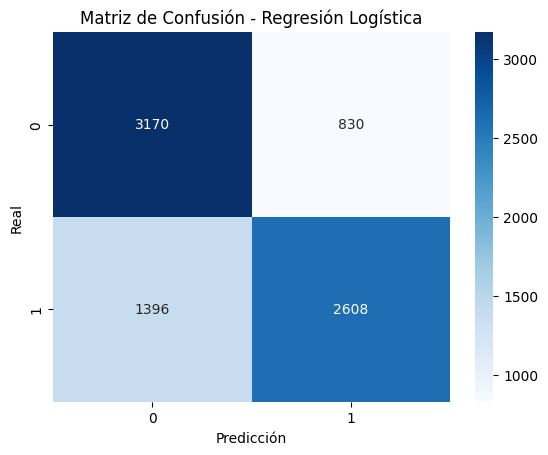

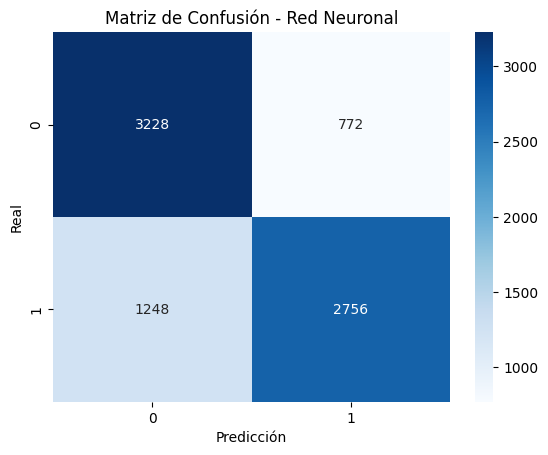

In [8]:
# 🧱 Matrices de Confusión
ev.plot_confusion_matrix(y_test, y_pred_log, model_name="Regresión Logística")
ev.plot_confusion_matrix(y_test, y_pred_nn, model_name="Red Neuronal")

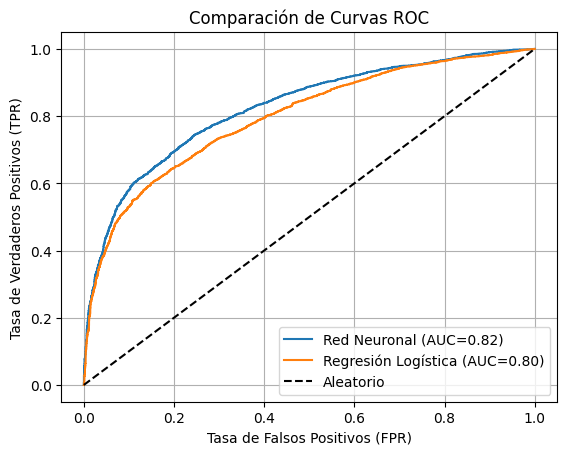

In [9]:
# 📈 Comparación de curvas ROC
ev.plot_roc_comparison(y_test, y_proba_nn, y_test, y_proba_log,
                       label1="Red Neuronal", label2="Regresión Logística")

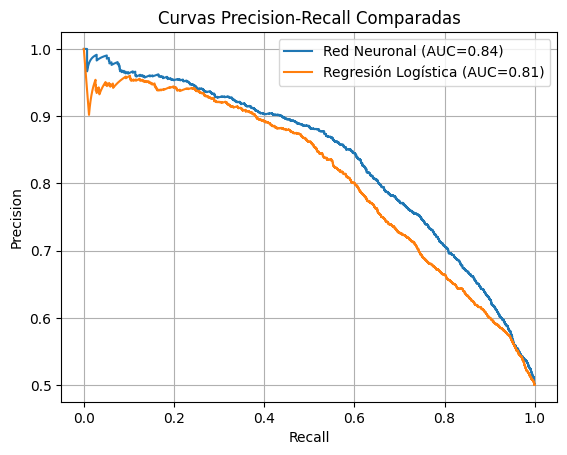

In [10]:
# 🔍 Comparación de curvas Precision-Recall
ev.plot_precision_recall_curves(y_test, y_proba_nn, y_test, y_proba_log,
                                 label1="Red Neuronal", label2="Regresión Logística")

In [11]:
# 📋 Comparación de métricas en tabla
df_metrics = ev.compare_models_metrics(
    y_test, y_pred_nn, y_proba_nn,
    y_test, y_pred_log, y_proba_log,
    model_name_1="Red Neuronal",
    model_name_2="Regresión Logística"
)

import IPython.display as display
display.display(df_metrics)

,Modelo,Precision,Recall,F1-score,ROC AUC
0,Red Neuronal,0.781179,0.688312,0.731811,0.823708
1,Regresión Logística,0.758581,0.651349,0.700887,0.796762


In [12]:
### 📊 Pregunta de reflexión
#¿En qué umbral se maximiza el F1-score para cada modelo? ¿Te parece razonable utilizar 0.5 como punto de corte en este contexto?
#¿Es uno de los modelos más conservador o arriesgado que el otro?

## Repuestas

### ¿En qué umbral se maximiza el F1-score para cada modelo? ¿Te parece razonable utilizar 0.5 como punto de corte en este contexto?

En este análisis, ambos modelos fueron evaluados utilizando el umbral por defecto de **0.5**. A ese punto de corte se obtuvieron los siguientes F1-score:

- **Red Neuronal**: 0.7227  
- **Regresión Logística**: 0.7009

Ambos modelos muestran un desempeño razonable y balanceado entre precisión y recall con ese umbral. Por lo tanto as mientender el 0.5 es un punto de corte aceptable para este contexto general. Sin embargo, si el objetivo fuera reducir los falsos negativos (por ejemplo, evitar no detectar a personas que efectivamente caerán en mora), sería recomendable explorar un umbral más bajo para mejorar el recall, aunque se incremente el número de falsos positivos.

---

### ¿Es uno de los modelos más conservador o arriesgado que el otro?

Sí, los modelos muestran diferencias claras en su comportamiento:

- **Red Neuronal**: Mayor **recall** (0.663) y menor número de **falsos negativos** (1348). Es un modelo **más arriesgado**, favorece identificar más casos positivos (personas que caerán en mora), aunque aumente el número de falsos positivos.
  
- **Regresión Logística**: Menor recall (0.651) y mayor número de falsos negativos (1396). Se comporta como un modelo **más conservador**, comete menos falsos positivos, pero podría no detectar a varias personas en riesgo.

En conclusión:
- La **Red Neuronal** es adecuada si se prioriza **detectar la mayor cantidad de casos de mora**.
- La **Regresión Logística** podría ser preferible si se busca **reducir el costo de falsos positivos**.

